Details of the Dataset :

Attribute Information:

* age
sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore")

In [57]:
#Read the dataset
data = pd.read_csv(r'C:\Users\DELL\Downloads\HeartDisease_dataset.csv')

Displaying the top 5 rows of the dataset :

In [58]:
#First 5 observation units of dataset accessed
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Checking the last 5 rows of the dataset :

In [59]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


Find the Shape of the data :

In [60]:
data.shape

(1025, 14)

In [61]:
print('The number of rows in the dataset: ',data.shape[0])
print('The number of columns in the dataset: ',data.shape[1])

The number of rows in the dataset:  1025
The number of columns in the dataset:  14


Since, we have 14 rows and 1025 columns in Heart Disease Dataset

Fetching the information about the dataset :

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Since, we have 1025 rows, 14 columns as datatype 'int64' 1 column as datatype 'floated64' and memory requirement of 112.2 KB

Checking Null Values in the dataset :

In [63]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

This indicates that we do not have any null values in the disease dataset.

Checking for the data duplicates and dropping them :

In [64]:
data_duplicates = data.duplicated().any()
print(data_duplicates)

True


The output of the variable 'data_duplicates' is 'True' which shows that there exists some of the duplicate values for the dataset.

Dropping Duplicates

In [65]:
data = data.drop_duplicates()

The method drop_duplicates() removes all the duplicated values from the dataset.Now,let us calculate the shape of the dataset and check whether the duplicates are removed or not.

In [66]:
data.shape

(302, 14)

Now, the column has been reduced to 302 from 1024 which indicates that duplicates are removed from the dataset.

Fetching the numerical desciption of the data :

In [67]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Finding the correlation between different attributes using correlation matrix :

<Axes: >

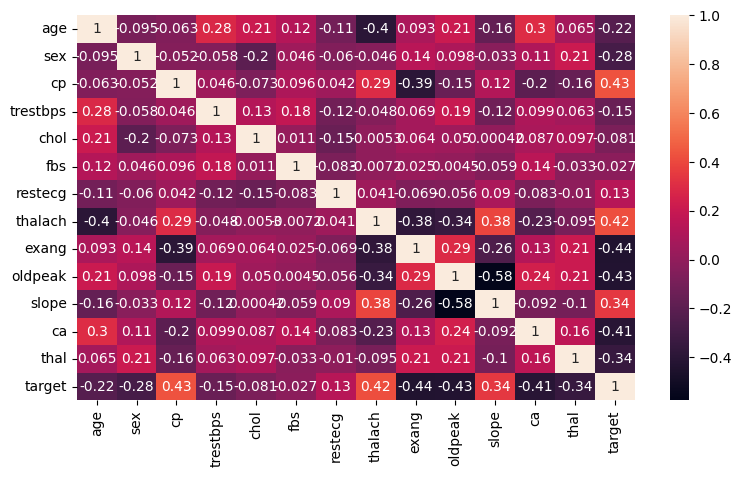

In [77]:
plt.figure(figsize=(9,5))
sns.heatmap(data.corr(),annot=True)

Checking the number of peoples with or without Heart Disease :

In [78]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [79]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

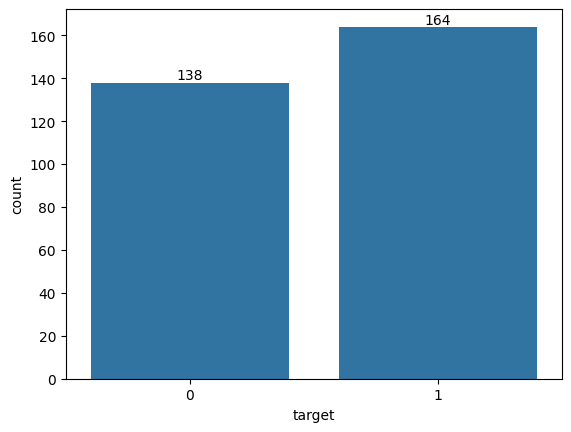

In [90]:
ax = sns.countplot(x=data['target'])
for i in ax.containers:
    ax.bar_label(i,)

From here, we can Conclude that more than half of the peoples have Heart Diseases whereas about to half of the peoples do not have Heart Disease.

Determining the count of males and females in the dataset :

In [82]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [83]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

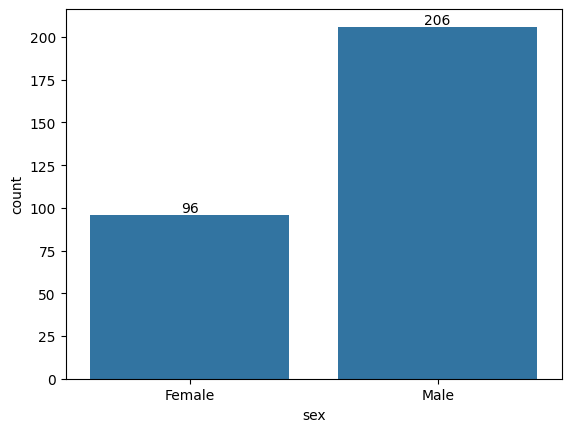

In [85]:
ax = sns.countplot(x=data['sex'])
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks([0,1],['Female','Male'])
plt.show()

From the above, Males have the more Heart Disease than Females.

According to the target variable- Fetching the Gender Distribution.

In [86]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

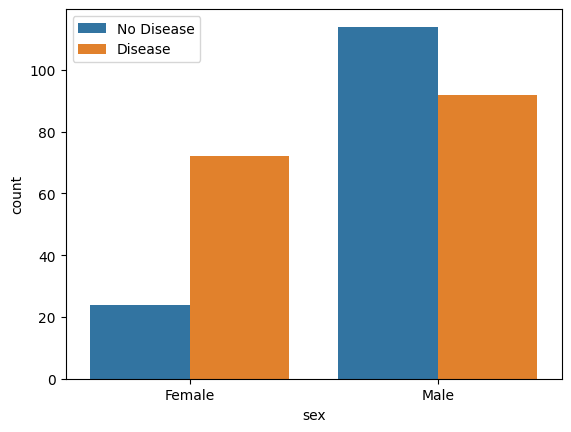

In [89]:
sns.countplot(x='sex',hue='target',data=data)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No Disease','Disease'])
plt.show()
            

From the above plot,we can observe that there are more Males than Females in both cases(with disease or without disease).

Obtaining the Age distribution in the dataset :

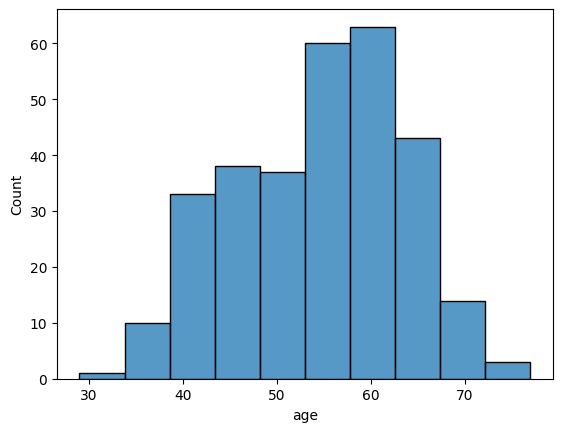

In [92]:
sns.histplot(data['age'],bins=10)
plt.show()

From the above graph, we can observe that there are maximum number of peoples that lies under the age distribution 50-60.

Checking the Chest Pain Type :

Four Values of Chest Pain Type -
* 0 - Typical Angina
* 1 - Atypial Angina
* 2 - Non-Anginal Pain
* 3 - Asymptomatic

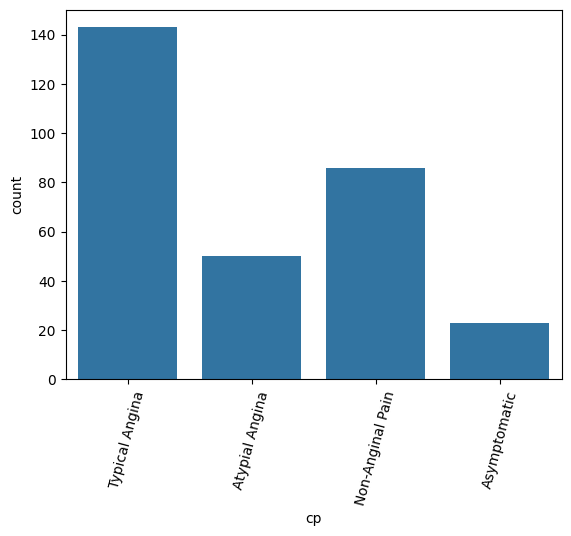

In [94]:
sns.countplot(x=data['cp'])
plt.xticks([0,1,2,3],['Typical Angina','Atypial Angina','Non-Anginal Pain','Asymptomatic'])
plt.xticks(rotation=75)
plt.show()

From the above plot, we can clearly observe that Chest Pain Type(0), i.e. Typical Angina is more common among the people.

Chest Pain distribution as per target variable :

In [95]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

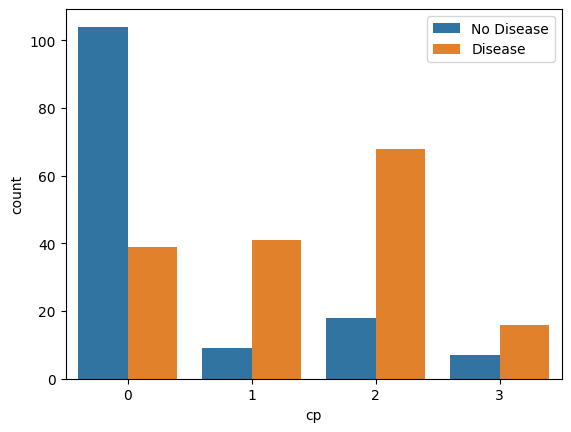

In [96]:
sns.countplot(x='cp',hue='target',data=data)
plt.legend(labels=['No Disease','Disease'])
plt.show()

From the above, we can observe that most people have 'Non-Anginal Chest Pain' , i.e- Chest Pain without Heart disease. Chest Pain can be subjective due to Stress, Physical Activities and many more.It varies between gender.

According to target variable - Fasting Blood Sugar Distribution :

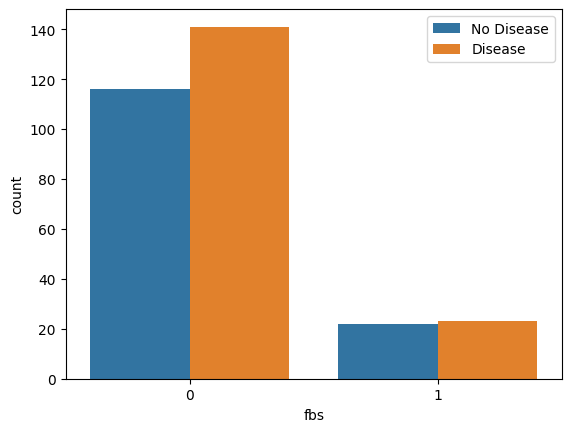

In [97]:
sns.countplot(x='fbs',hue ='target',data=data)
plt.legend(labels=['No Disease','Disease'])
plt.show()

" fbs stands for Fasting Blood Sugar ". Those people have fbs > 120 is considered as Diabetic. 
From the above plot, we can observe that 'There are higher number of Heart Disease patients without Diabetes'.

Resting Blood Pressure Distribution :

In [98]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

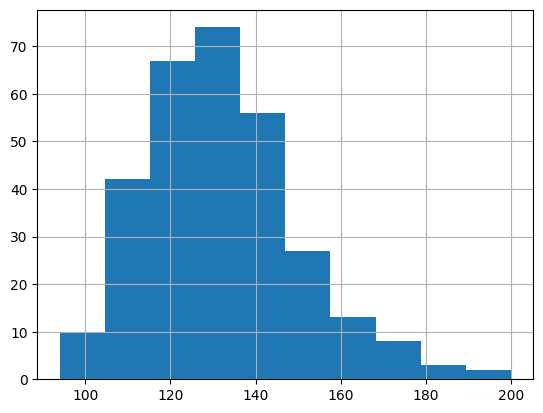

In [99]:
data['trestbps'].hist()

Above plot clearly shows that the BP of the peoples is between 120 to 130.

Comparing the Resting Blood Pressure as per sex column :

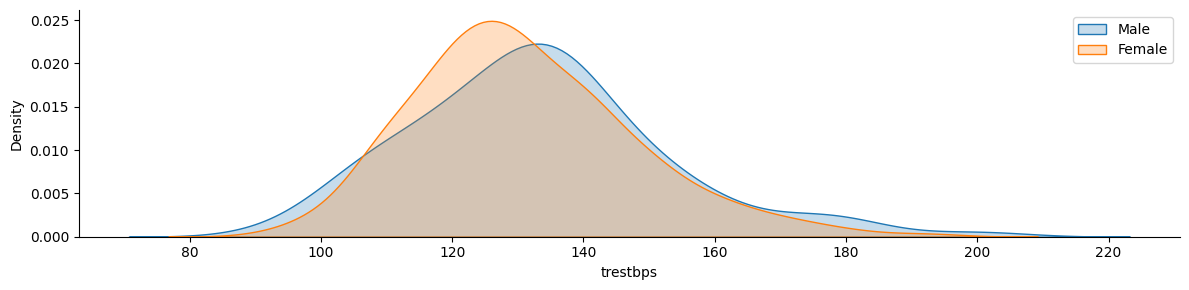

In [100]:
g= sns.FacetGrid(data,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])
plt.show()

From the above plot, we can observe that the " Women has lower resting blood pressure as compared to the men" (W<M). For Women, around 120 and For Men, little less than 140.

Distribution of Serum Cholesterol :

In [102]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

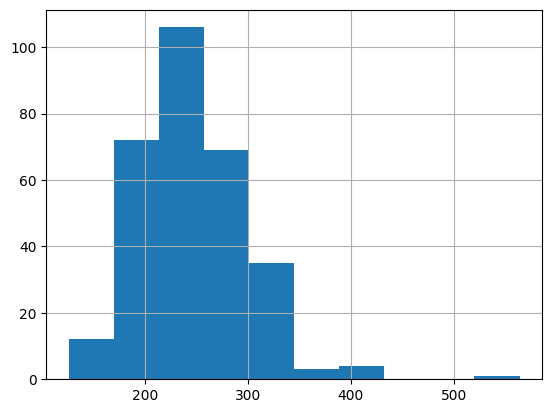

In [103]:
data['chol'].hist()

" Healthy Serum Cholesterol < 200 mg/dl ". From the above, we can draw the conclusion that- " Serum Cholestrol is around 250 mg/dl ", i.e- Higher than Normal. 

Plotting the Continuous Variables :

In [109]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [111]:
cate_val = [ ]
cont_val = [ ]
for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
        

In [112]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [113]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

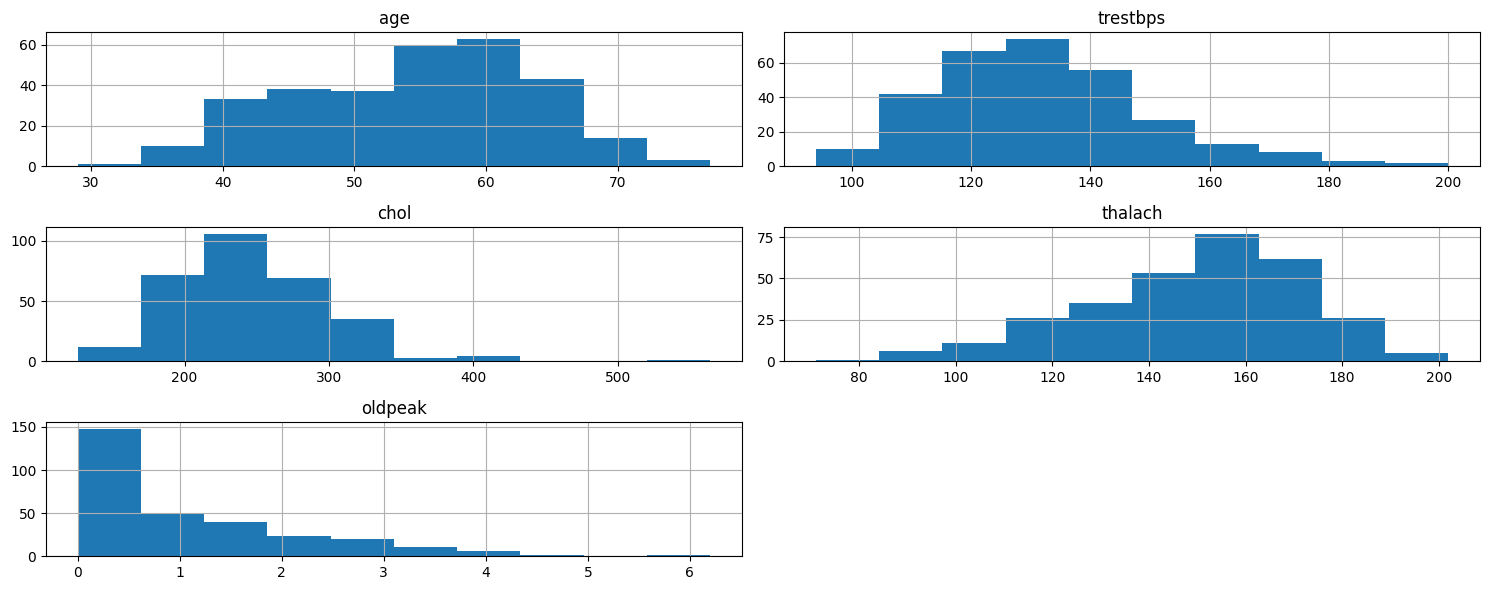

In [114]:
data.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()

This way, we can show the distribution of continuous variables. From these plots, we can see the Normal Distribution to the 'age','trestbps',and most to the 'chol' columns whereas the 'oldpeak' column is left-skewed and the 'thalach' column is right-skewed.

Exporting the final Dataset in CSV format to build dashboard in Power BI -

In [ ]:
data.to_csv (r'D:\Download\Heart Disease Diagnosis')